In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X,Y = np.loadtxt("Salary_Data.csv", skiprows=1,unpack=True, delimiter=',')

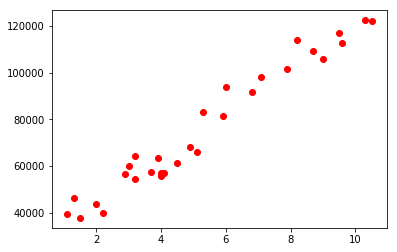

In [22]:
plt.plot(X,Y, 'ro')

In [23]:
X

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [24]:
Y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.50, random_state=0)

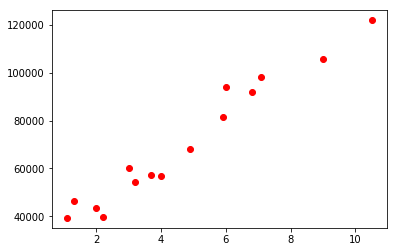

In [26]:
plt.plot(X_train,Y_train, 'ro')

In [27]:
X_one = []
for item in X_train:
    X_one.append([1, item])

In [28]:
theta0 = theta1 = 0
theta = np.transpose(np.array([theta0, theta1]))
cost = (np.sum((np.dot(X_one, theta) - Y_train)**2))/(2*np.size(X_train))

In [29]:
cost

2813315758.9666667

In [30]:
alpha=0.05

In [31]:
def gradientDescent(theta0, theta1):
    theta = np.transpose(np.array([theta0, theta1]))
    temp0 = theta0 - ((alpha/np.size(X_train)) * (np.sum(np.dot(X_one, theta) - Y_train)) )
    temp1 = theta1 - ((alpha/np.size(X_train)) * np.dot((np.dot(X_one, theta) - Y_train), np.transpose(X_train)))
    theta0 = temp0
    theta1 = temp1
    return (theta0, theta1)

In [32]:
def costFunction(theta0, theta1):
    theta = np.transpose(np.array([theta0, theta1]))
    hypothesis = np.dot(X_one, theta)
    return (np.sum((hypothesis - Y_train)**2))/(2*np.size(X_train))

In [33]:
def iteration(theta0, theta1):
    (theta0, theta1) = gradientDescent(theta0, theta1)
    cost = costFunction(theta0, theta1)
    return (cost, theta0, theta1)

In [34]:
old_theta0 = old_theta1 = 0
while(1):
    (cost, theta0, theta1) = iteration(theta0, theta1)
    if(theta0 == old_theta0 and theta1 == old_theta1):
        break
    old_theta0 = theta0; old_theta1 = theta1
print(cost, theta0, theta1)

14224216.589535777 27275.400977994963 9183.592437483381


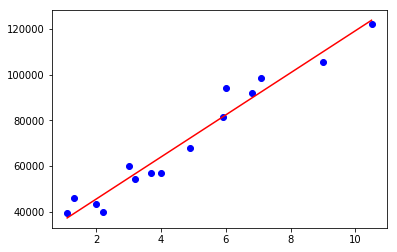

In [35]:
plt.plot(X_train,Y_train, 'bo')
x = np.linspace(1.1,10.5)
y = theta0 + theta1*x 
plt.plot(x, y, '-r', label='y=27275.4 + 9183.6*x')

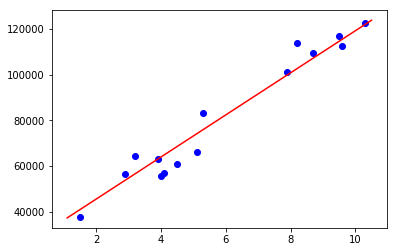

In [18]:
plt.plot(X_test, Y_test, 'bo')
x = np.linspace(1.1, 10.5)
y = theta0 + theta1*x
plt.plot(x, y, '-r' , label="y=27275.4 + 9183.6*x")